### References

* XGB Documentation: https://xgboost.readthedocs.io/en/stable/ 
* Boosting (Wiki): https://en.wikipedia.org/wiki/Boosting_(machine_learning) 

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
import pandas as pd 
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data["PRICE"] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [11]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

In [12]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
reg = xgb.XGBRegressor(objective='reg:linear', max_depth=5, n_estimators=10)
reg.fit(X_train, y_train)
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

[21:10:31] WARNING: /Users/travis/build/dmlc/xgboost/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
mse_train = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
rmse_train = np.sqrt(mse_train)

mse_test = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"RMSE train = {rmse_train}")
print(f"RMSE test = {rmse_test}")

RMSE train = 1.9069844478483007
RMSE test = 2.9688577481282032


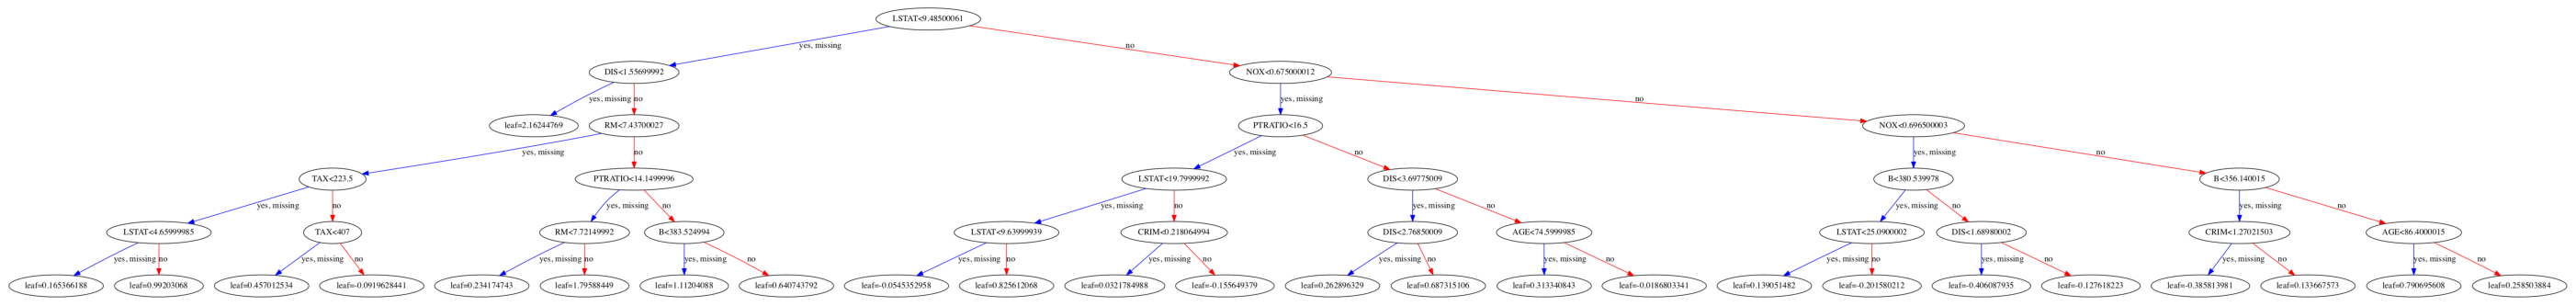

In [30]:
import matplotlib.pyplot as plt 
# %matplotlib inline 

xgb.plot_tree(reg, num_trees=8)
plt.rcParams["figure.figsize"] = [50, 10]
plt.show()

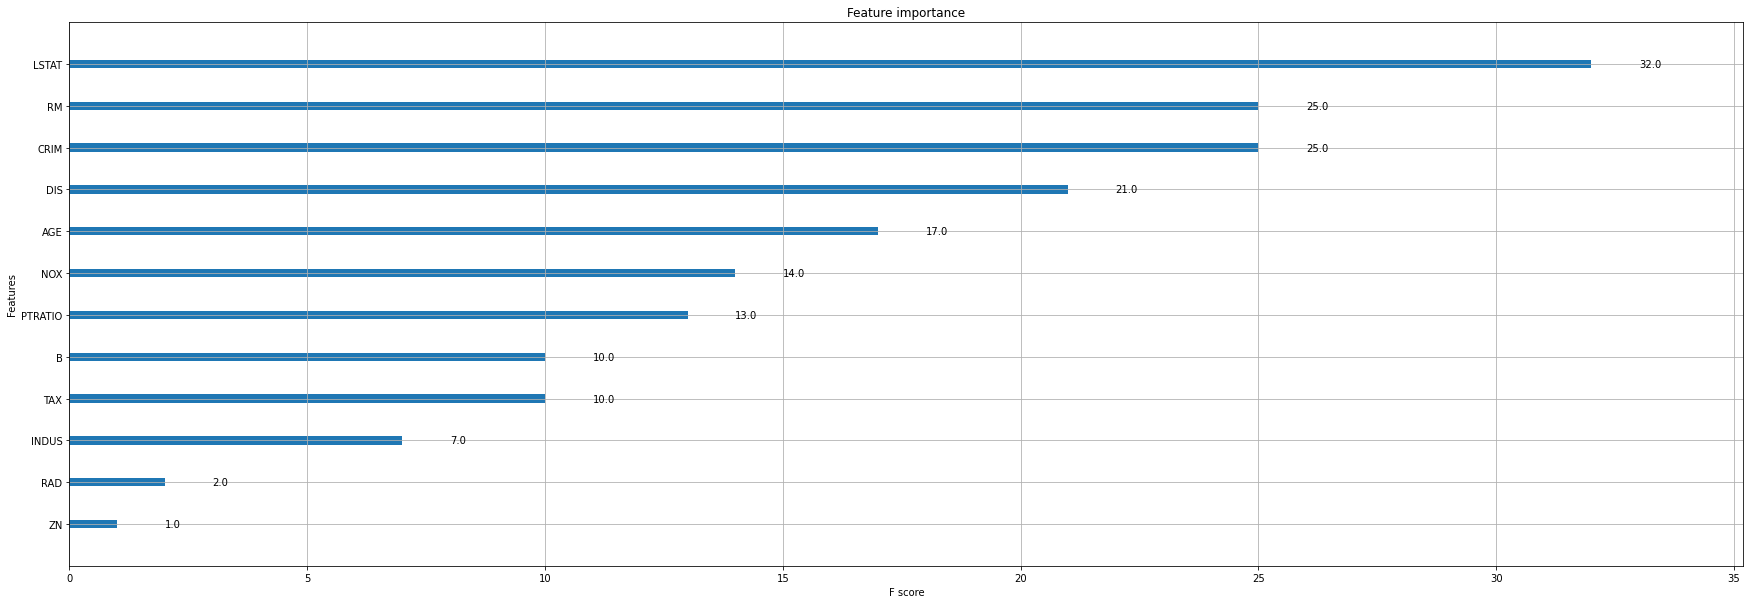

In [34]:
xgb.plot_importance(reg)
plt.rcParams["figure.figsize"] = [50, 10]
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

mse_train_lr = mean_squared_error(y_true=y_train, y_pred=y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

mse_test_lr = mean_squared_error(y_true=y_test, y_pred=y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

print(f"RMSE train = {rmse_train_lr}")
print(f"RMSE test = {rmse_test_lr}")

RMSE train = 4.6520331848801675
RMSE test = 4.928602182665355
